In [1]:
%matplotlib inline

import json
import os.path
import sys
import glob
import re
from urllib import parse as up
import pickle

from bs4 import BeautifulSoup

In [2]:
HTML_FILE_LOCATION="../data/ncsi-1.html"
HTML_FILE_LOCATION_PATTERN="../data/ncsi-*.html"

In [3]:
class IteratedMeter(object):
    """
    Firefox is rather flimsy when reporting its opinion of digests
    """
    
    def __init__(self):
        self.origin2count = {}
        self.seen = set()
        
    def assimilate(self, filename):
        data_contents = open(filename, 'r')
        soup = BeautifulSoup(data_contents, 'html.parser')
        tbody = soup.find_all("tbody")
        newly_assimilated = 0
        origin2count = self.origin2count
        for (i,tr) in enumerate( tbody[1].find_all("tr") ):
            tds = list( tr.find_all("td") )
            url = str( tds[0].contents[0].string )
            parsed_tp = up.urlparse(url)
                    #print("pair: " , pn, parsed_tp.netloc, "a: ", href)
            netloc = parsed_tp.netloc
            if re.match("^[0-9]+$", netloc):
                pass 
            elif netloc not in ('', None) and parsed_tp.scheme in ("http", "https"):
                if url not in self.seen:
                    newly_assimilated += 1
                    self.seen.add(url)
                    count = origin2count.setdefault(netloc, 0)
                    count += 1 
                    origin2count[netloc] = count
            else:
                pass
        print("Newly assimilated: ", newly_assimilated)
        
    def stats(self):
        count_origin = [ (count, origin) for (origin, count) in self.origin2count.items() ]
        count_origin.sort( key=(lambda x: -x[0]))
        return count_origin

In [24]:
iterated_meter = IteratedMeter()
for filename in glob.glob(HTML_FILE_LOCATION_PATTERN):
    iterated_meter.assimilate(filename)

Newly assimilated:  722
Newly assimilated:  0
Newly assimilated:  659
Newly assimilated:  0
Newly assimilated:  379
Newly assimilated:  0
Newly assimilated:  8
Newly assimilated:  0
Newly assimilated:  0
Newly assimilated:  390
Newly assimilated:  461
Newly assimilated:  0
Newly assimilated:  0
Newly assimilated:  0


In [51]:
im_stats=iterated_meter.stats()
print( im_stats[:10] )

[(164, 'apx.moatads.com'), (113, 'bonanzleimages.s3.amazonaws.com'), (76, 'cdn.salehoo.com'), (67, 'www.shimmercat.com'), (63, 'pagead2.googlesyndication.com'), (62, 'v4.moatads.com'), (57, 'www.salehoo.com'), (54, 'img0.etsystatic.com'), (52, 'srv-2016-06-27-11.pixel.parsely.com'), (52, 'img1.etsystatic.com')]


In [52]:
from matplotlib import pyplot as plt
import pandas as pd

In [56]:
frame = pd.DataFrame(im_stats[:10])
frame.to_html()

'<table border="1" class="dataframe">\n  <thead>\n    <tr style="text-align: right;">\n      <th></th>\n      <th>0</th>\n      <th>1</th>\n    </tr>\n  </thead>\n  <tbody>\n    <tr>\n      <th>0</th>\n      <td>164</td>\n      <td>apx.moatads.com</td>\n    </tr>\n    <tr>\n      <th>1</th>\n      <td>113</td>\n      <td>bonanzleimages.s3.amazonaws.com</td>\n    </tr>\n    <tr>\n      <th>2</th>\n      <td>76</td>\n      <td>cdn.salehoo.com</td>\n    </tr>\n    <tr>\n      <th>3</th>\n      <td>67</td>\n      <td>www.shimmercat.com</td>\n    </tr>\n    <tr>\n      <th>4</th>\n      <td>63</td>\n      <td>pagead2.googlesyndication.com</td>\n    </tr>\n    <tr>\n      <th>5</th>\n      <td>62</td>\n      <td>v4.moatads.com</td>\n    </tr>\n    <tr>\n      <th>6</th>\n      <td>57</td>\n      <td>www.salehoo.com</td>\n    </tr>\n    <tr>\n      <th>7</th>\n      <td>54</td>\n      <td>img0.etsystatic.com</td>\n    </tr>\n    <tr>\n      <th>8</th>\n      <td>52</td>\n      <td>srv-2016-06

In [26]:
import numpy as np

In [27]:
arr = np.array([x[0] for x in im_stats])

In [47]:
np.sum(arr)

2619

In [48]:
len(arr)

364

(array([ 253.,   84.,   26.]),
 array([  1,   5,  25, 125]),
 <a list of 3 Patch objects>)

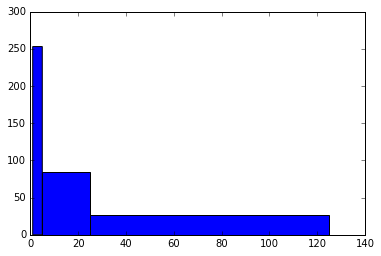

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.hist(arr, bins=[1, 5, 25, 125])

In [35]:
hst = np.histogram(arr,bins=[0,5,10,30,60,120,180])
hst

(array([253,  51,  37,  17,   5,   1]),
 array([  0,   5,  10,  30,  60, 120, 180]))

([<matplotlib.patches.Wedge at 0x7fae4f8f0f98>,
  <matplotlib.text.Text at 0x7fae4f8d5e10>])

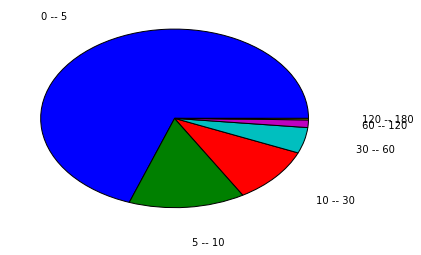

In [46]:
fig = plt.figure()
ax = fig.add_subplot(111)
labels = [ (str(hst[1][i]) + " -- " + str(hst[1][i+1])) for (i,x) in enumerate(hst[0])]
ax.pie(hst[0], labels=labels, labeldistance=1.4)

In [50]:
hst_arr = np.array(hst[0])
sm = np.sum(hst_arr)
percents = hst_arr / sm * 100
(sm, percents, hst[1])

(364, array([ 69.50549451,  14.01098901,  10.16483516,   4.67032967,
          1.37362637,   0.27472527]), array([  0,   5,  10,  30,  60, 120, 180]))

In [20]:
df = pd.DataFrame(im_stats)

In [23]:
df[0].describe()

count    333.000000
mean       6.480480
std       14.528029
min        1.000000
25%        1.000000
50%        2.000000
75%        6.000000
max      164.000000
Name: 0, dtype: float64